# Import

In [1]:
import numpy as np
import tensorflow as tf
# from google.colab import files
# files.upload()
diaset=np.loadtxt("./diabetes.csv",delimiter=",",skiprows=1)
# di=pd.read_csv("./diabetes.csv")

#------------
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
# print(diaset.shape)
# print(type(diaset))
# # di.hist(figsize=(9,9))

In [ ]:
# print(diaset)

In [2]:
'''
ndarray 多維陣列
ndarray[:,0:8] 
: 代表index 從0取到n-1；

0:8 代表index從0取到7
'''
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(diaset[:,0:8],diaset[:,8],train_size=0.85)

# x_train=diaset[:,0:8]
# y_train=diaset[:,8]
# print(x_train)

In [ ]:
# print(x_train.shape)
# print(y_train.shape)
# print(y_train)

# Building model

In [3]:
model=Sequential()

In [4]:
#hidden layers
model.add(Dense(units="20",activation="relu",input_shape=(8,)))
model.add(Dense(units="10",activation="relu",input_shape=(8,)))
#output layer
model.add(Dense(units="1",activation="sigmoid"))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                180       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [7]:
train=model.fit(x_train,y_train,batch_size=20,epochs=250,validation_data=(x_test,y_test))

Epoch 1/250
33/33 [==============================] - 1s 7ms/step - loss: 14.9698 - accuracy: 0.3972 - val_loss: 6.4211 - val_accuracy: 0.4914
Epoch 2/250
33/33 [==============================] - 0s 2ms/step - loss: 3.9090 - accuracy: 0.5153 - val_loss: 1.6350 - val_accuracy: 0.5345
Epoch 3/250
33/33 [==============================] - 0s 3ms/step - loss: 1.0742 - accuracy: 0.5537 - val_loss: 1.0288 - val_accuracy: 0.5345
Epoch 4/250
33/33 [==============================] - 0s 2ms/step - loss: 0.8764 - accuracy: 0.6028 - val_loss: 0.8661 - val_accuracy: 0.5603
Epoch 5/250
33/33 [==============================] - 0s 2ms/step - loss: 0.8131 - accuracy: 0.6043 - val_loss: 0.7586 - val_accuracy: 0.6207
Epoch 6/250
33/33 [==============================] - 0s 2ms/step - loss: 0.7595 - accuracy: 0.6212 - val_loss: 0.7121 - val_accuracy: 0.6466
Epoch 7/250
33/33 [==============================] - 0s 2ms/step - loss: 0.7275 - accuracy: 0.6181 - val_loss: 0.7259 - val_accuracy: 0.6552
Epoch 8/250


In [8]:
training_score=model.evaluate(x_train,y_train)
testing_score=model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.4724 - accuracy: 0.7845


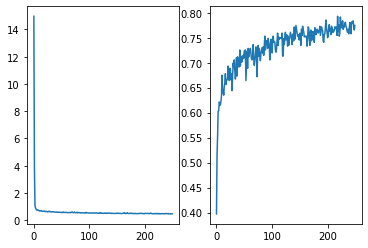

In [9]:
train.history["loss"]
plt.subplot(1,2,1)
plt.plot(train.history["loss"])
# plt.plot(train.history["val_loss"])
plt.subplot(1,2,2)
plt.plot(train.history["accuracy"])

In [10]:
# randIndex=np.random.randint(0,len(x_train))
# print(randIndex)
# x_test=np.array([x_train[2],x_train[16]])
# pregnant Glu BloodPressure Skin Insulin BMI DPF age


print(y_test[31:60])
manualPredict=model.predict(x_test[31:60])
print(manualPredict)

[0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 1. 0. 1.]
[[0.12806141]
 [0.48559764]
 [0.27103287]
 [0.16702303]
 [0.20027196]
 [0.10817653]
 [0.3543203 ]
 [0.1641511 ]
 [0.9129275 ]
 [0.16121715]
 [0.01379877]
 [0.19115436]
 [0.9218504 ]
 [0.7006963 ]
 [0.4882913 ]
 [0.09425223]
 [0.2003856 ]
 [0.6879089 ]
 [0.13850975]
 [0.10754132]
 [0.08097985]
 [0.10004756]
 [0.19476998]
 [0.7158519 ]
 [0.27937877]
 [0.43722007]
 [0.6758179 ]
 [0.05815479]
 [0.546654  ]]


In [11]:
st=0
en=5
# xx=np.array([x_test[num]])
xx_test=np.array([
  [6,148,72,35,0,33.6,0.627,50],  #1
  [1,85,66,29,0,26.6,0.351,31],  #0
  [8,183,64,0,0,23.3,0.672,32],  #1
  [1,89,66,23,94,28.1,0.167,21],  #0
  [0,137,40,35,168,43.1,2.288,33] #1
])
predict=model.predict(xx_test[st:en])
# print(x_test[st:en])
# print(y_test[st:en])
print(predict)

[[0.7027066 ]
 [0.10239139]
 [0.93218935]
 [0.14649284]
 [0.92357904]]


# Save model

In [12]:
filePath="./save_model.h5"
model.save(filePath)
loadModel=tf.keras.models.load_model(filePath)
converter=tf.lite.TFLiteConverter.from_keras_model(loadModel)
tfModel=converter.convert()

with open("./model.tflite","wb") as file:
  file.write(tfModel)
# https://towardsdatascience.com/a-basic-introduction-to-tensorflow-lite-59e480c57292

INFO:tensorflow:Assets written to: /tmp/tmppgplnu4t/assets


# Check .tflite

In [4]:
interpreter = tf.lite.Interpreter(model_path="./model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(type(input_details))
print(type(input_details[0]))

<class 'list'>
<class 'dict'>


In [ ]:
input_shape=input_details[0]["shape"]
print(input_shape)

[1 8]


In [13]:
# check input details
for i in input_details[0]:
    print("{:}: {:}".format(i,input_details[0][i]))
print()
for i in output_details[0]:
    print("{:}: {:}".format(i,output_details[0][i]))

name: dense_input
index: 0
shape: [1 8]
shape_signature: [-1  8]
dtype: <class 'numpy.float32'>
quantization: (0.0, 0)
quantization_parameters: {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}
sparsity_parameters: {}

name: Identity
index: 10
shape: [1 1]
shape_signature: [-1  1]
dtype: <class 'numpy.float32'>
quantization: (0.0, 0)
quantization_parameters: {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}
sparsity_parameters: {}


In [20]:
# test data
test_data=np.array([[0,126,80,0,0,29.8,0,21]],dtype="float32")
# put test data into tensor
interpreter.set_tensor(input_details[0]['index'], test_data)

# Check to set tensor
interpreter.invoke() 

In [21]:
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)
# print(output_details[0]['index'])

[[0.13191968]]
